In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os,random

#from keras.models import model_from_json
from keras.models import load_model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [2]:
batch_size = 32
# 画像サイズ
H = 224
W = 224
C = 3
# ディレクトリ
test_dir = './data/test'
display_dir = './data/display'
label=['homura','kyoko','madoka','mami','sayaka']

# 結果を表示するファイルの選択

In [3]:
#file_name = './model/cnn_madomagi'
file_name = './model/vgg16_fine'

# モデル・データの読み込み

In [4]:
model = load_model(file_name + '.h5')

W0329 17:15:43.531973 11356 deprecation_wrapper.py:119] From C:\Users\tak-o\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0329 17:15:45.006932 11356 deprecation_wrapper.py:119] From C:\Users\tak-o\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [5]:
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(H, W),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 412 images belonging to 5 classes.


# 結果

In [6]:
# テストスコア
score = model.evaluate_generator(test_generator)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])


 test loss: 0.7700209617614746

 test_acc: 0.8300970792770386


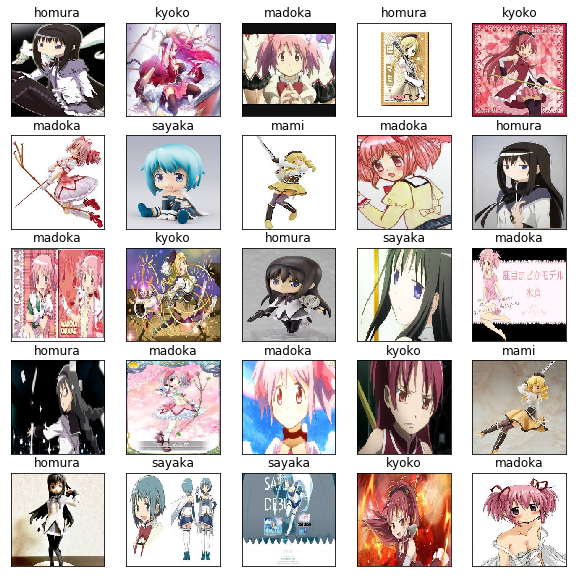

In [7]:
# 画像の表示
files = os.listdir(display_dir)
img = random.sample(files, 25)

plt.figure(figsize=(10, 10))
for i in range(25):
    temp_img = load_img(os.path.join(display_dir ,img[i]), target_size=(H, W))
    plt.subplot(5, 5, i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1, H, W, 3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])